# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [16]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I enjoyed my flight. The bo...
1,✅ Trip Verified | Why do you make it so hard? ...
2,✅ Trip Verified | After several delays and ca...
3,Not Verified | Literally the worst flight of ...
4,✅ Trip Verified | I swore I would never fly B...


In [9]:
df.to_csv("sample_data/BA_reviews.csv",index = False)

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [72]:
#read the data afeter we save it
reviews_df = pd.read_csv('sample_data/BA_reviews.csv')
reviews_df.tail()

,reviews
995,Not Verified | Los Angeles to London. I booke...
996,Not Verified | The overall flight wasn't too ...
997,✅ Trip Verified | \r\nBA’s Galleries lounge at...
998,✅ Trip Verified | Gatwick to San Jose. I’ve j...
999,✅ Trip Verified | I took the new option of the...


## Data Cleaning

In [79]:
#from pandas.core.internals.blocks import replace_regex
#from pandas.core.dtypes.dtypes import re
#remove this text ✅ Trip Verified  
reviews_df = reviews_df.replace(to_replace=r'✅ Trip Verified \||Not Verified \|', value='', regex=True)  

In [83]:
reviews_df.head()

,reviews
0,I enjoyed my flight. The boarding was swift ...
1,Why do you make it so hard? After a so so lou...
2,"After several delays and canceled flights, w..."
3,Literally the worst flight of my life. After...
4,I swore I would never fly BA again after the...


In [82]:
#remove the last unwanted expresion (\r\n)
reviews_df = reviews_df.replace(to_replace='\r\n', value='', regex=True)  
reviews_df.tail()

,reviews
995,"Los Angeles to London. I booked with AA, LAX..."
996,The overall flight wasn't too bad. Seats and...
997,BA’s Galleries lounge at CPT is adequate but ...
998,Gatwick to San Jose. I’ve just stepped onto ...
999,I took the new option of the new Toronto to L...


Now our data is clean and Ready for analysis 

## Data Exploration 

In [85]:
# Import nltk and download vader_lexicon
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [98]:
# Import SentimentIntensityAnalyzer and create an object
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
polarity = []
# Analyze a sample text
for review in range(len(reviews_df)):
  polarity.append(sia.polarity_scores(reviews_df['reviews'][review]))

In [103]:
reviews_rates = pd.DataFrame(polarity)

array([[<Axes: title={'center': 'neg'}>, <Axes: title={'center': 'neu'}>],
       [<Axes: title={'center': 'pos'}>,
        <Axes: title={'center': 'compound'}>]], dtype=object)

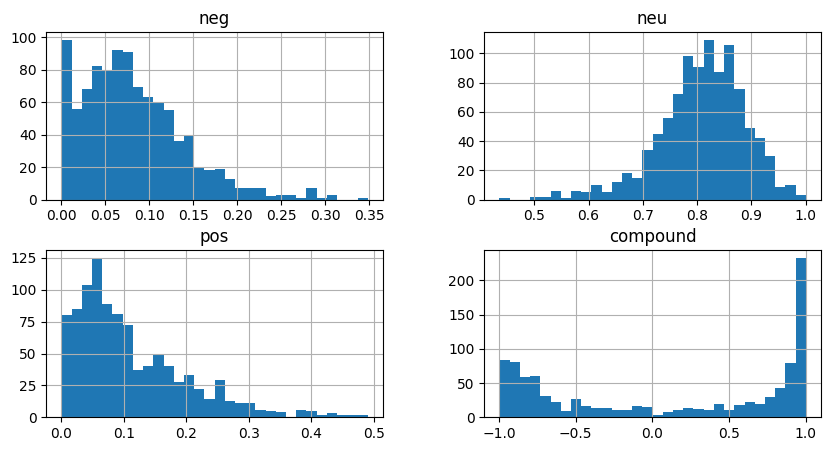

In [107]:
#distribution of rates 
reviews_rates.hist(bins = 30,figsize=(10,5))